In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib notebook

In [2]:
%aimport CryMOS.Bulk

from CryMOS.QV import *
from CryMOS.plots import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-notebook')

## Bulk Model

<IPython.core.display.Javascript object>


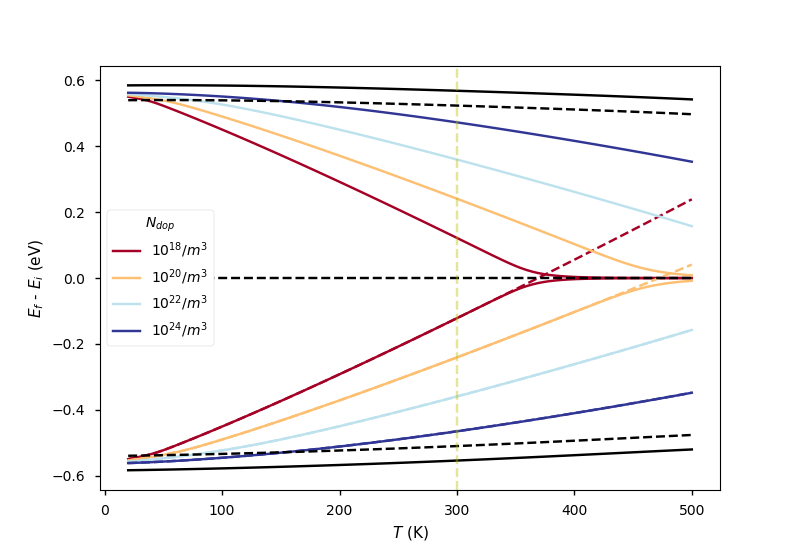

In [3]:
from CryMOS.constants import eps_siox
import matplotlib.colors as colors

temp = np.linspace(20,500,100)
N_A_list  = [1e18, 1e20, 1e22, 1e24]

line_list = N_A_list
fig,ax = plt.subplots()

for i,N_A in enumerate(N_A_list):
    bulk = BeckersQVpy(N_A=N_A,N_D=0.).param_sweep(temp=temp)
    #bulk1 = BeckersQVpy(N_A=0,N_D=N_A).param_sweep(temp=temp)
    
    bulk_t = DiracQVpy(N_A=N_A,N_D=0.).param_sweep(temp=temp)
    bulk1_t = DiracQVpy(N_A=0,N_D=N_A).param_sweep(temp=temp)
    
    col = plt.cm.RdYlBu(colors.LogNorm(1e18, vmax=1e24)(N_A))
    ax.plot(temp, bulk_t.E_f/e - bulk.E_i/e, color=col)
    line_list[i], = ax.plot(temp, bulk1_t.E_f / e - bulk.E_i / e, color=col)
    ax.plot(temp, bulk.E_f/e - bulk.E_i/e, '--', color=col)

ev, = ax.plot(temp,bulk.E_v/e-bulk.E_i/e,color='k')
ec, = ax.plot(temp,bulk.E_c/e-bulk.E_i/e,color='k')
ea, = ax.plot(temp,bulk.E_A/e-bulk.E_i/e,color='k',linestyle='--')
ed, = ax.plot(temp,bulk.E_D/e-bulk.E_i/e,color='k',linestyle='--')
ei, = ax.plot(temp,0*temp,color='k',linestyle='--',label= r'$E_i$')

ax.axvline(300, c='y', ls='--', alpha=.4)
plt.xlabel(r"$T$ (K)")
plt.ylabel(r"$E_f$ - $E_i$ (eV)")
ax.legend(line_list,[r'$10^{18} / m^3$', r'$10^{20} / m^3$', r'$10^{22} / m^3$', r'$10^{24} / m^3$'],
          title=r'$N_{dop}$',framealpha=1)
plt.show()